# Ensemble Learning
---

## 1. Ensemble method

### 1.1 Hard Voting

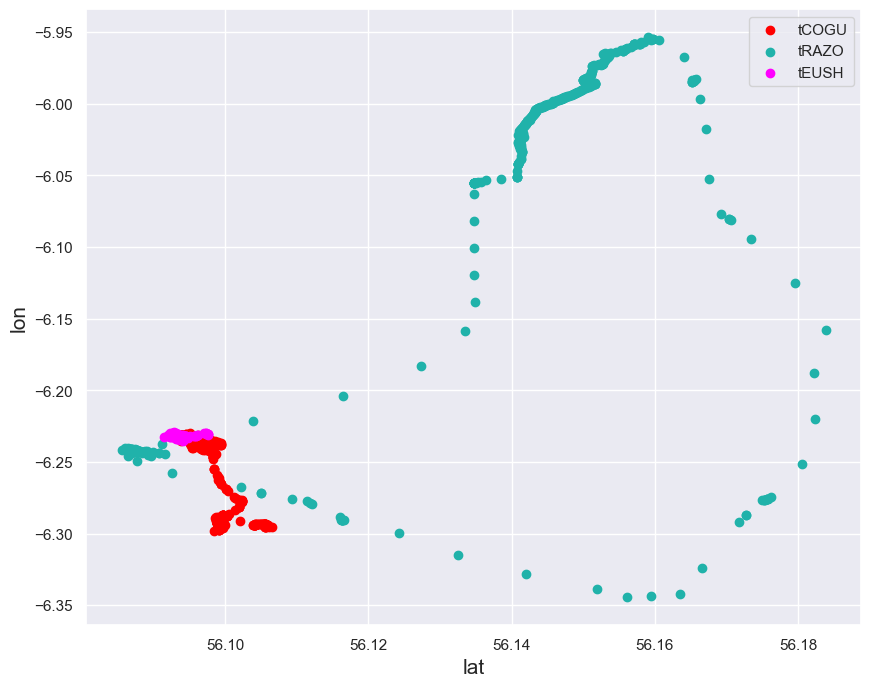

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df =  pd.read_csv("Datasets/gps_bird.zip")

df1 = df[df.species == "tCOGU"][:500]
df2 = df[df.species == "tRAZO"][:500]
df3 = df[df.species == "tEUSH"][:500]
df = pd.concat([df1,df2,df3])


X = df[['lat', 'lon']].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "tCOGU":
        return 0 
    elif y == "tRAZO":
        return 1
    else:
        return 2
         
# # Extract out labels, and convert labels to numpy array
y = df["species"].map(make_labels).to_numpy()
         

# Plot the data
seabirds = ["tCOGU","tRAZO","tEUSH"]
colors = ["red","lightseagreen","magenta"]


fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(seabirds, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.lat,
               temp_df.lon,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("lat", fontsize = 15)
ax.set_ylabel("lon", fontsize = 15)
ax.legend()
plt.show()

In [22]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.32166666666666666
logistic regression accuracy: 0.5366666666666666
random forest accuracy: 0.9666666666666667
voting classifier accuracy: 0.5366666666666666


---

### 1.2 Bagging

In [33]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)

stump_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       184
           1       1.00      0.71      0.83       212
           2       0.68      0.97      0.80       204

    accuracy                           0.83       600
   macro avg       0.88      0.83      0.84       600
weighted avg       0.88      0.83      0.83       600
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       184
           1       1.00      0.99      1.00       212
           2       0.92      0.97      0.95       204

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600
 



In [37]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       184
           1       1.00      0.71      0.83       212
           2       0.70      0.83      0.76       204

    accuracy                           0.82       600
   macro avg       0.84      0.82      0.82       600
weighted avg       0.84      0.82      0.82       600
 



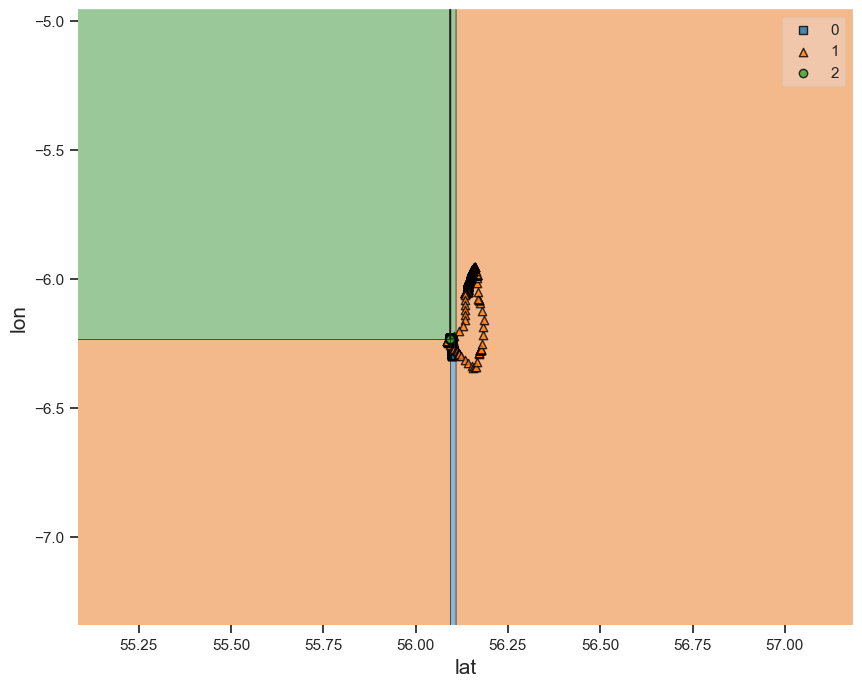

In [38]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

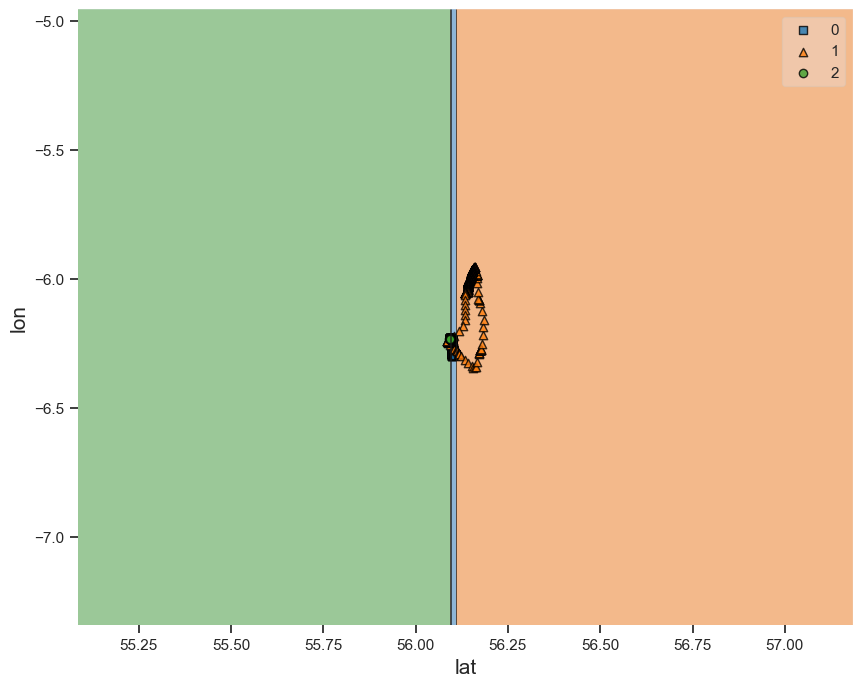

In [39]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

---

### 1.3 Random Forest

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")



Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       184
           1       1.00      0.99      1.00       212
           2       0.93      0.95      0.94       204

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       184
           1       1.00      0.71      0.83       212
           2       0.70      0.83      0.76       204

    accuracy                           0.82       600
   macro avg       0.84      0.82      0.82       600
weighted avg       0.84      0.82      0.82       600
 



In [41]:
forest_clf = RandomForestClassifier(max_depth = 2, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       184
           1       1.00      0.71      0.83       212
           2       0.70      0.83      0.76       204

    accuracy                           0.82       600
   macro avg       0.84      0.82      0.82       600
weighted avg       0.84      0.82      0.82       600
 



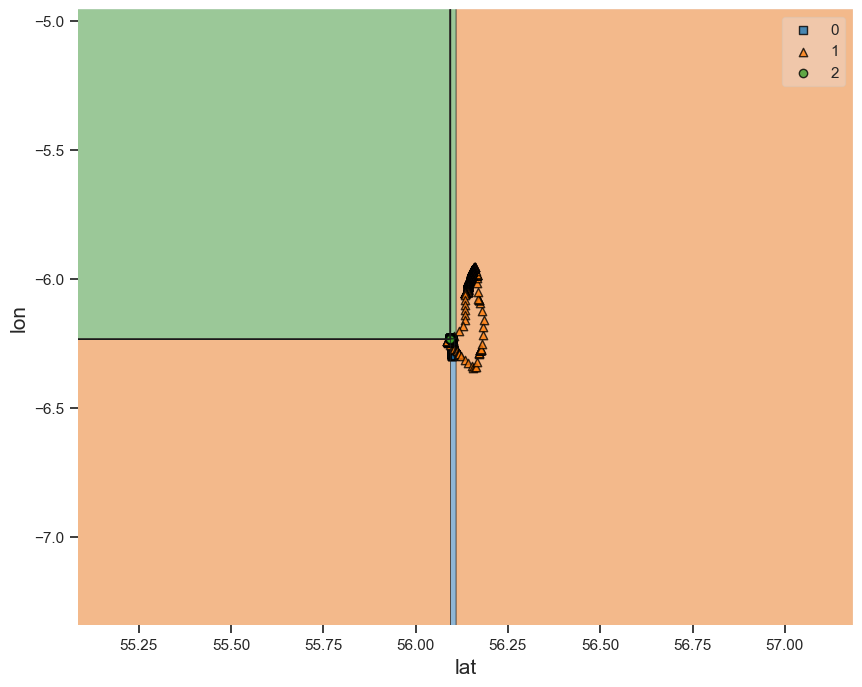

In [45]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

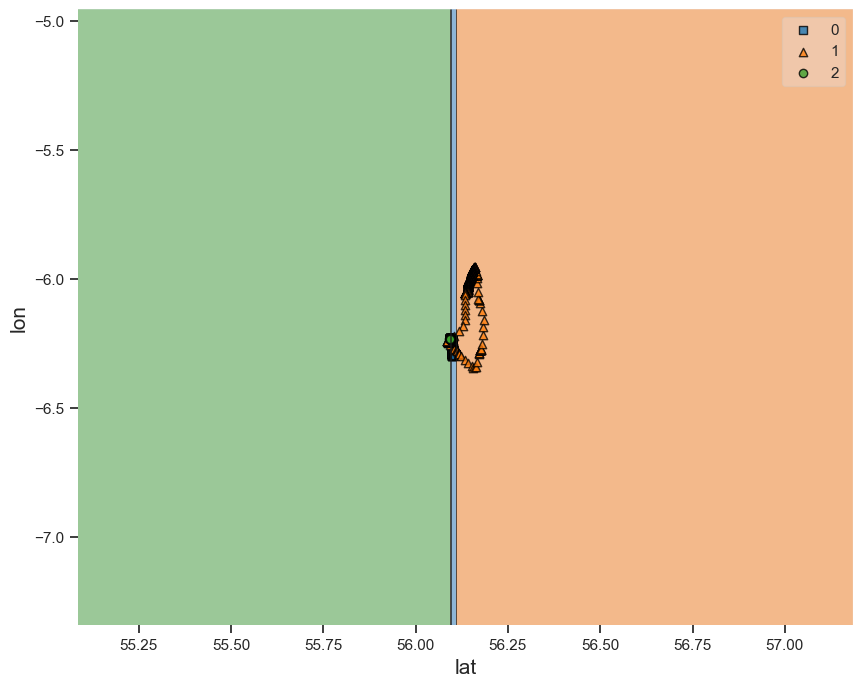

In [46]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

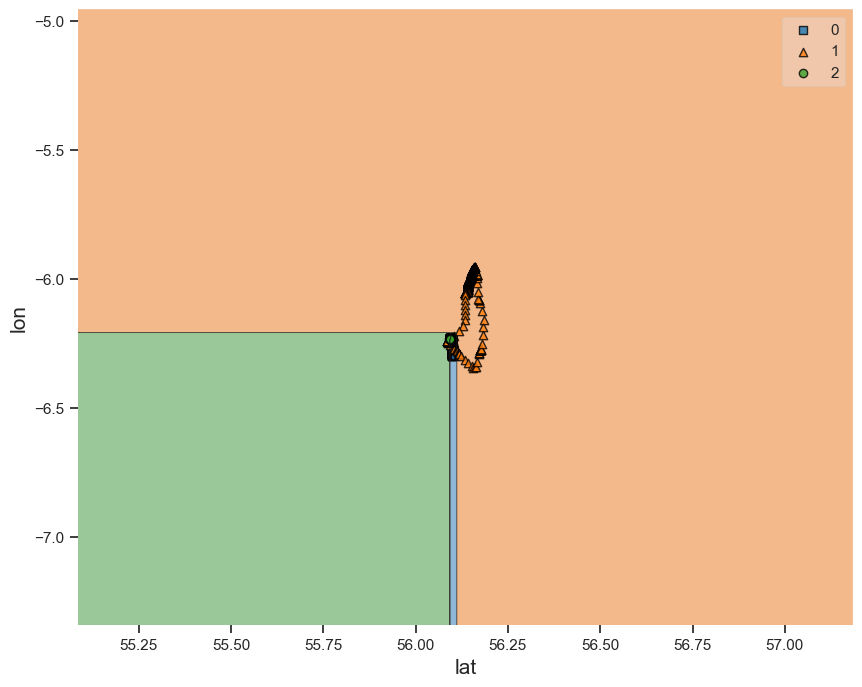

In [47]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

X = df[["lat", "lon", "alt", "max_depth.m"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       184
           1       1.00      0.99      0.99       212
           2       0.94      0.95      0.94       204

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       184
           1       1.00      0.71      0.83       212
           2       0.70      0.99      0.82       204

    accuracy                           0.75       600
   macro avg       0.77      0.74      0.74       600
weighted avg       0.77      0.75      0.74       600
 



In [50]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       184
           1       1.00      0.71      0.83       212
           2       0.70      0.99      0.82       204

    accuracy                           0.75       600
   macro avg       0.77      0.74      0.74       600
weighted avg       0.77      0.75      0.74       600
 



In [51]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       184
           1       1.00      0.71      0.83       212
           2       0.70      0.99      0.82       204

    accuracy                           0.75       600
   macro avg       0.77      0.74      0.74       600
weighted avg       0.77      0.75      0.74       600
 



---

## 2. Ensemble Boosting

### 2.1 Ada Boost

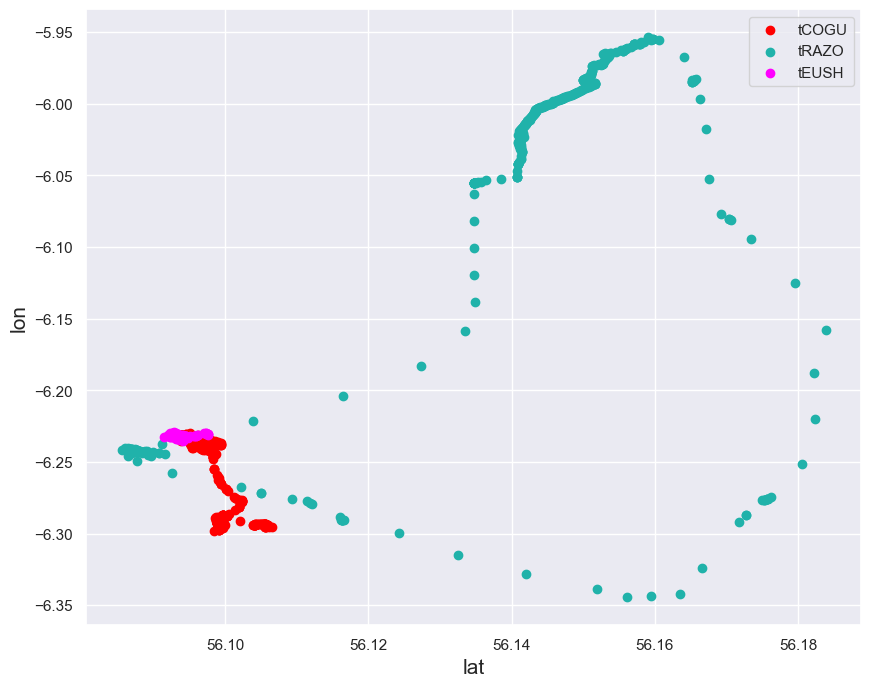

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df =  pd.read_csv("Datasets/gps_bird.zip")

df1 = df[df.species == "tCOGU"][:500]
df2 = df[df.species == "tRAZO"][:500]
df3 = df[df.species == "tEUSH"][:500]
df = pd.concat([df1,df2,df3])


X = df[['lat', 'lon']].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "tCOGU":
        return 0 
    elif y == "tRAZO":
        return 1
    else:
        return 2
         
# # Extract out labels, and convert labels to numpy array
y = df["species"].map(make_labels).to_numpy()
         

# Plot the data
seabirds = ["tCOGU","tRAZO","tEUSH"]
colors = ["red","lightseagreen","magenta"]


fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(seabirds, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.lat,
               temp_df.lon,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("lat", fontsize = 15)
ax.set_ylabel("lon", fontsize = 15)
ax.legend()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       198
           1       0.99      0.99      0.99       194
           2       0.79      0.98      0.88       208

    accuracy                           0.90       600
   macro avg       0.92      0.90      0.90       600
weighted avg       0.92      0.90      0.90       600
 



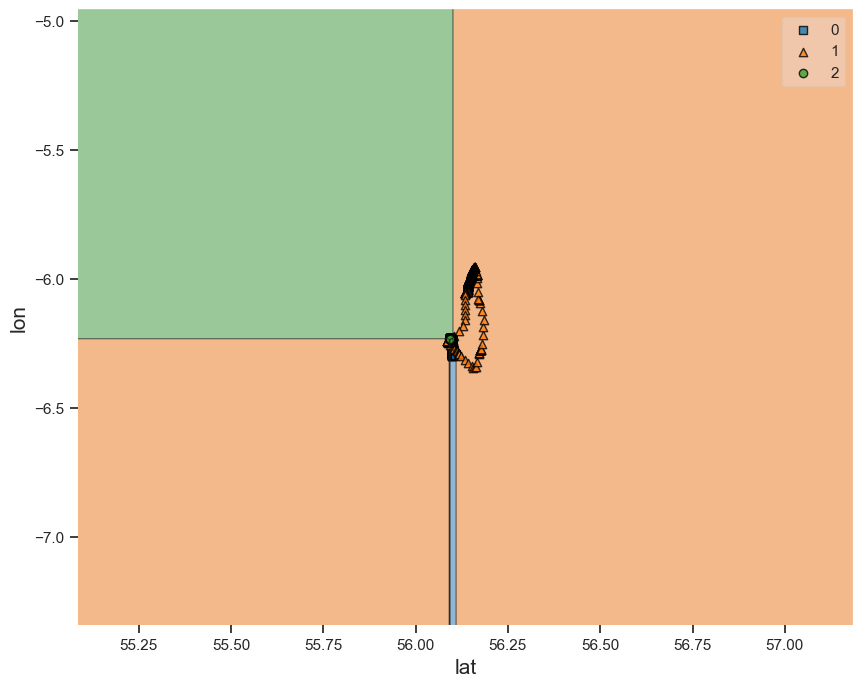

In [57]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

In [59]:
X = df[["lat", "lon", "alt", "max_depth.m"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       198
           1       1.00      0.97      0.99       194
           2       0.78      0.78      0.78       208

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600
 



---

### 2.2 Gradient Boosting 

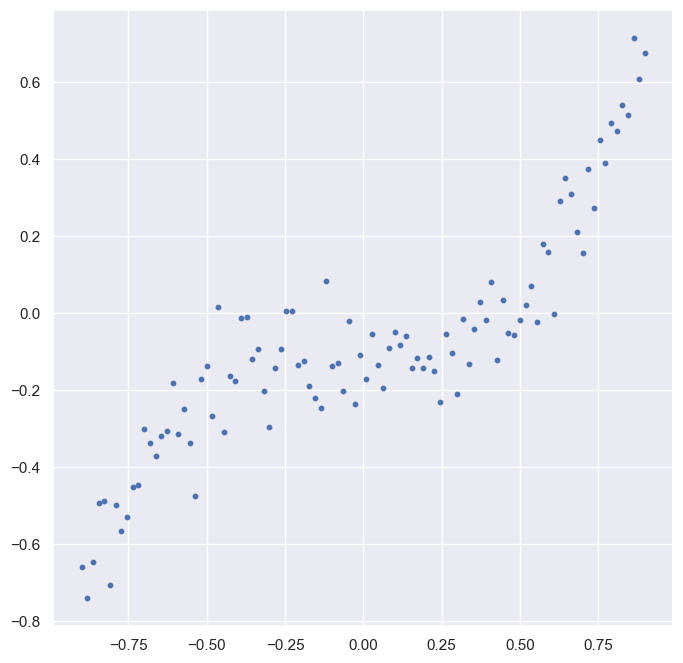

In [77]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = (X ** 3) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()

In [78]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

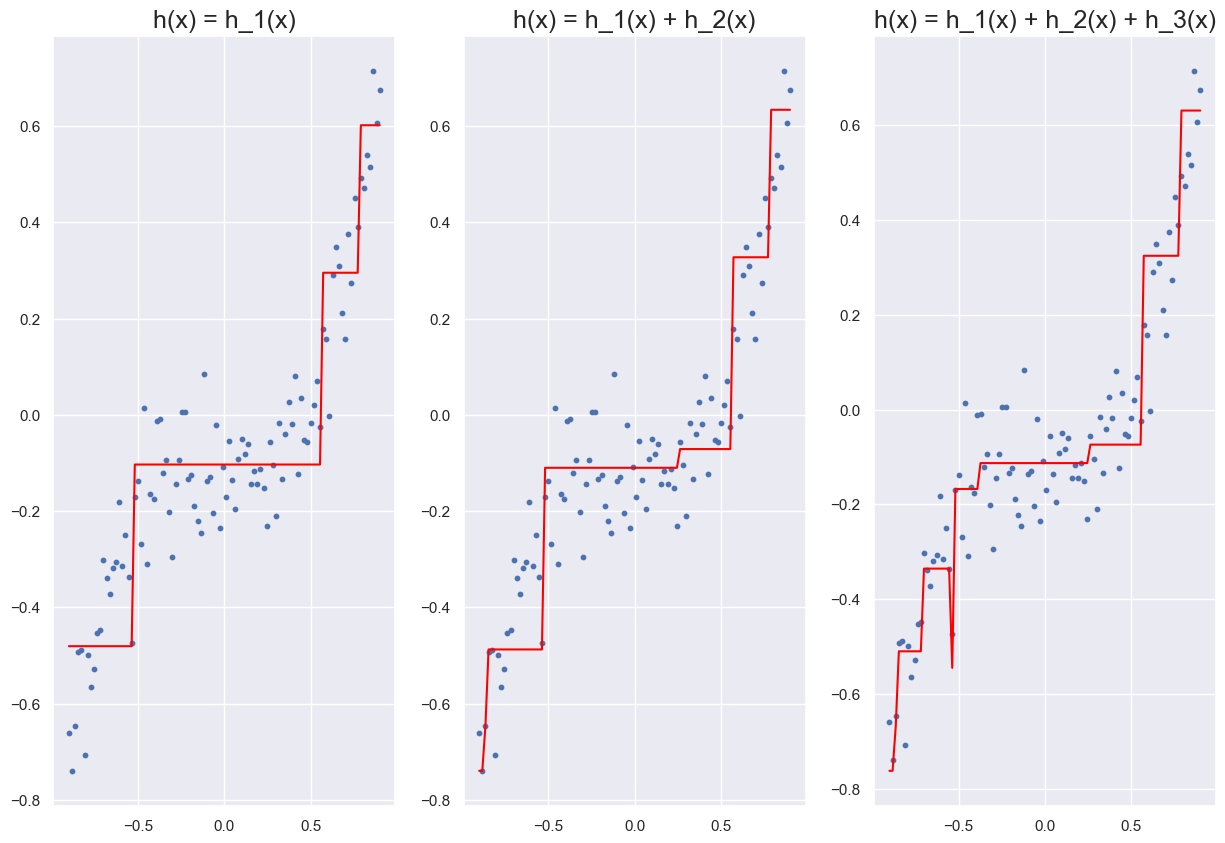

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

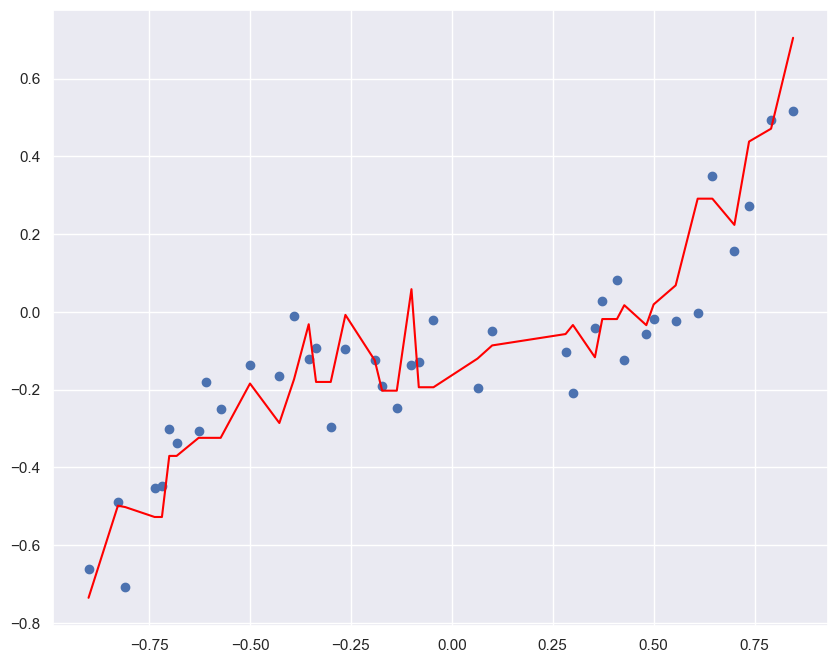

In [81]:

y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()